# OUSD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('C:\\Users\\Claudia\\Anaconda3\\envs\\py37')
sys.path


['',
 'C:\\Users\\Claudia\\Anaconda3\\python36.zip',
 'C:\\Users\\Claudia\\Anaconda3\\DLLs',
 'C:\\Users\\Claudia\\Anaconda3\\lib',
 'C:\\Users\\Claudia\\Anaconda3',
 'C:\\Users\\Claudia\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Claudia\\Anaconda3\\lib\\site-packages\\sklearn_pandas-1.7.0-py3.6.egg',
 'C:\\Users\\Claudia\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Claudia\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Claudia\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Claudia\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Claudia\\.ipython',
 'C:\\Users\\Claudia\\Anaconda3\\envs\\py37']

### Read Budget Data
Remove rows not related to central offices

In [3]:
df = pd.read_csv('data/OUSD Budget Data.csv', skiprows = 1)
df.columns = ['Fund', 'Resource_Type', 'Resource', 'Site_Type', 'Site', 'Budget_Category', 'Budget', 'Actual_Spent', 'Encumbrance', 'Balance']

df = df[df['Site'].astype(str).str[0] == '9']  # Remove rows not related to central offices
df.head(3)

,Fund,Resource_Type,Resource,Site_Type,Site,Budget_Category,Budget,Actual_Spent,Encumbrance,Balance
0,01 - GENERAL FUND,RESTRICTED,3010 - IASA-I BASIC GRANTS LOW INCOME,District Wide,999 - Districtwide Expenses,4392 - MID-YEAR ADJUSTMENT,"($303,925)",$0,$0,"($303,925.37)"
1,01 - GENERAL FUND,RESTRICTED,3010 - IASA-I BASIC GRANTS LOW INCOME,District Wide,999 - Districtwide Expenses,4399 - SURPLUS,$0,$0,$0,$0.00
2,01 - GENERAL FUND,RESTRICTED,3010 - IASA-I BASIC GRANTS LOW INCOME,District Wide,999 - Districtwide Expenses,7310 - INTERPROGRAM SUPPORT/COSTS,"$951,400",$0,$0,"$951,400.00"


### Convert Budget and Actual_Spent Columns to Numeric Values

In [4]:
# replace characters in Budget column that come from excel exports, leaving just the numbers
df['Budget'] = df['Budget'].replace({'\$':'', ',': '', 
                                     '\)':'', '\(':'-'
                                    }, regex = True)

df['Budget'].fillna(0, inplace=True)    # replace NaN values with 0
df['Budget'] = df['Budget'].astype(int).fillna(0)    # convert Budget column to integer

In [5]:
# replace characters in Actual_Spent column that come from excel exports, leaving just the numbers
df['Actual_Spent'] = df['Actual_Spent'].replace({'\$':'', ',': '', 
                                                 '\)':'', '\(':'-'
                                                }, regex = True)

df['Actual_Spent'].fillna(0, inplace=True)    # replace NaN values with 0
df['Actual_Spent'] = df['Actual_Spent'].astype(int).fillna(0)    # convert Actual_Spent column to integer

### Create a dataframe with one line per Site, summing Budget amounts for that Site

In [6]:
df_grouped = df.groupby('Site', as_index = False)["Budget"].sum()
df_grouped.head()

,Site,Budget
0,901 - Chief Org Eff & Cul.,708859
1,902 - Accounts Payable,895003
2,903 - Office of Chief Academic offic,1158483
3,905 - Office of Sr. Business Officer,536463
4,906 - Ombudsman,269540


### Read Principal Critical-Rating Data (partial at this point)
I created a separate csv file mapping the categories in the principal's list to categories from budget data. There could be errors, and I could not determine a mapping for some categories.

In [7]:
df_critical = pd.read_csv('data/map_budget_to_principal_list.csv')
del df_critical["Notes"]  # the notes column is irrelevant to this task, and is mostly NaN
df_critical.head()

,Budget_Category,Principal_Category,Critical_Rating
0,999 - Districtwide Expenses,NaN,NaN
1,998 - School Contingency Funds,NaN,NaN
2,995 - Transportation,Transportation,60.0
3,994 - OUSD Police Department,Police Services,54.0
4,992 - WAREHOUSE DISTRIBUTION,NaN,NaN


### Merge in the Principal Critical Ratings

In [8]:
df_with_critical = pd.merge(df_grouped, df_critical, how='right', 
                            left_on = 'Site', right_on = 'Budget_Category', 
                            left_index = False, right_index = False, sort=False)
df_final = df_with_critical.dropna().copy()   # remove rows with no principal rating
df_final.head()

,Site,Budget,Budget_Category,Principal_Category,Critical_Rating
0,901 - Chief Org Eff & Cul.,708859.0,901 - Chief Org Eff & Cul.,Organizational Effectiveness,17.0
1,902 - Accounts Payable,895003.0,902 - Accounts Payable,Accounts Payable,77.0
5,907 - Student Assignment,1787223.0,907 - Student Assignment,School Enrollment Office,75.0
6,909 - Teaching & Learning,8403763.0,909 - Teaching & Learning,Academics & Instructional,45.0
7,910 - EARLY CHILDHOOD DEVELOPMENT,7484859.0,910 - EARLY CHILDHOOD DEVELOPMENT,Early Childhood,42.0


In [9]:
df_final['Budget_Percent'] = df_final['Budget'] / df_final['Budget'].sum() * 500
df_final.head()

# This produced a SettingWithCopyWarning. Explanation of this warning can be found at dataquest:
# https://www.dataquest.io/blog/settingwithcopywarning/
# The problem for me was that I was unknowingly working with a view of the dataset, not a copy. 
# Solution: force a copy when creating df_final in the cell above.

,Site,Budget,Budget_Category,Principal_Category,Critical_Rating,Budget_Percent
0,901 - Chief Org Eff & Cul.,708859.0,901 - Chief Org Eff & Cul.,Organizational Effectiveness,17.0,1.679712
1,902 - Accounts Payable,895003.0,902 - Accounts Payable,Accounts Payable,77.0,2.120799
5,907 - Student Assignment,1787223.0,907 - Student Assignment,School Enrollment Office,75.0,4.235003
6,909 - Teaching & Learning,8403763.0,909 - Teaching & Learning,Academics & Instructional,45.0,19.913553
7,910 - EARLY CHILDHOOD DEVELOPMENT,7484859.0,910 - EARLY CHILDHOOD DEVELOPMENT,Early Childhood,42.0,17.736118


### Show Initial Plot - side-by-side bar chart

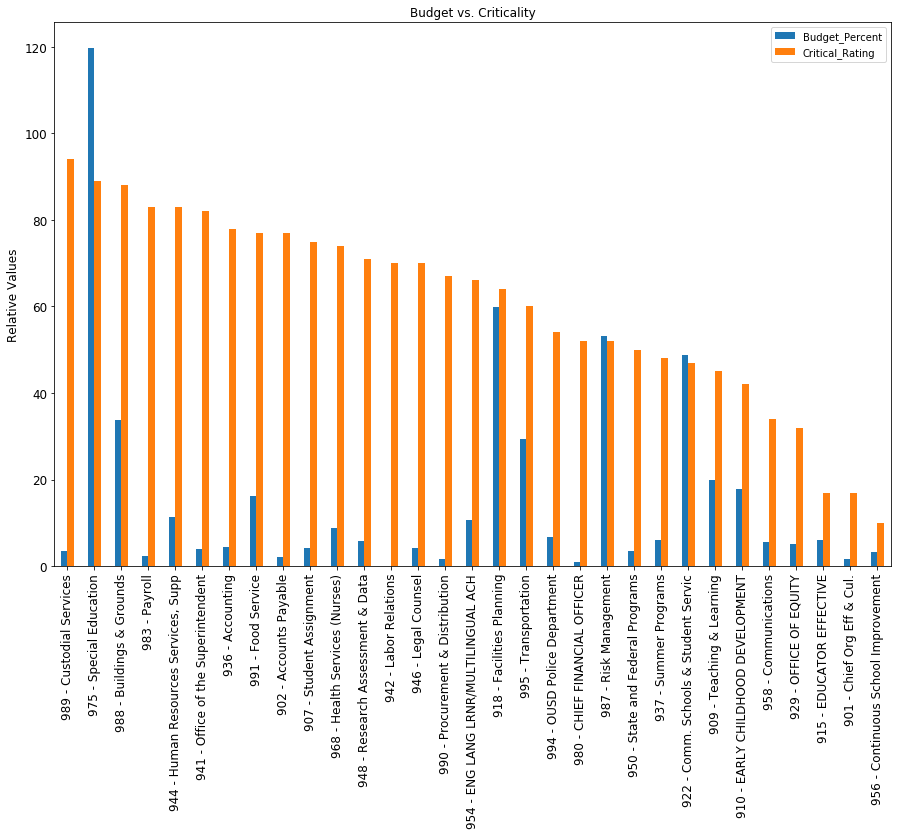

In [10]:
df_final = df_final.sort_values(by=['Critical_Rating'], ascending=False) 
ax = df_final[['Budget_Percent','Critical_Rating']].plot(kind='bar', title ="Budget vs. Criticality", 
                                                         figsize=(15, 10), legend=True, fontsize=12)
ax.set_ylabel("Relative Values", fontsize=12)
ax.set_xticklabels(df_final['Site'])
plt.show()

#### Remove Outlier
This category was quite a bit more in cost than any others and is 2nd from highest position in importance. It skews the scatter plot so that quadrants cannot be clearly demarcated. Outlier thus removed.

In [11]:
df_final = df_final[~df_final['Budget_Category'].str.startswith('975')] 

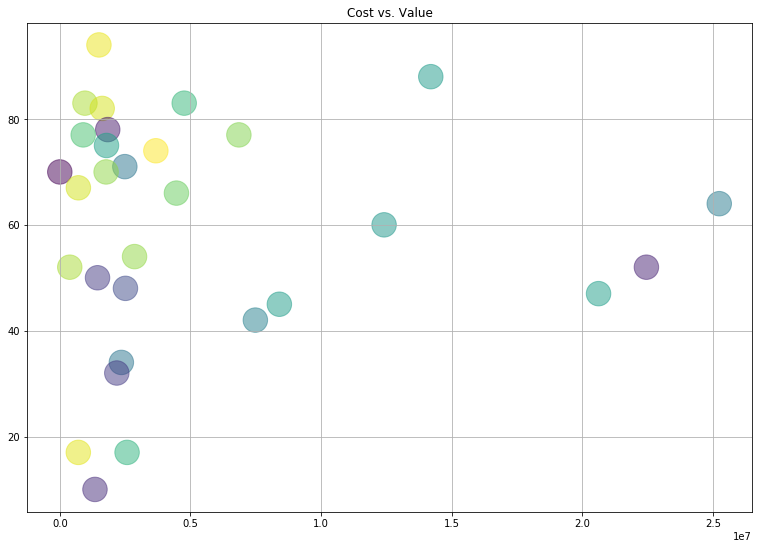

In [12]:
plt.rcParams['figure.figsize'] = (13.0, 9.0)
colors = np.random.rand(len(df_final))

plt.scatter(df_final['Budget'], df_final['Critical_Rating'], c=colors, s=600, alpha=0.5)  # , s=area, c=colors,
plt.title('Cost vs. Value')
plt.xlabel='Cost'
plt.ylabel='Value'
plt.grid()
plt.show()


In [32]:
json_obj = df_final.to_json(orient="records")[1:]  
json_obj = "var data = [" + json_obj 
with open('data/data.js', 'w') as f:
    f.write(json_obj)

In [33]:
from pprint import pprint
pprint(json_obj.replace('}, ', '}, \n'))

('var data = [{"Site":"989 - Custodial '
 'Services","Budget":1498145.0,"Budget_Category":"989 - Custodial '
 'Services","Principal_Category":"Custodial '
 'Services","Critical_Rating":94.0,"Budget_Percent":3.5500036513},{"Site":"988 '
 '- Buildings & Grounds","Budget":14199558.0,"Budget_Category":"988 - '
 'Buildings & Grounds","Principal_Category":"Building & '
 'Grounds","Critical_Rating":88.0,"Budget_Percent":33.6472656165},{"Site":"983 '
 '- Payroll","Budget":962511.0,"Budget_Category":"983 - '
 'Payroll","Principal_Category":"Payroll","Critical_Rating":83.0,"Budget_Percent":2.2807655897},{"Site":"944 '
 '- Human Resources Services, Supp","Budget":4761716.0,"Budget_Category":"944 '
 '- Human Resources Services, '
 'Supp","Principal_Category":"Talent","Critical_Rating":83.0,"Budget_Percent":11.2833598794},{"Site":"941 '
 '- Office of the Superintendent","Budget":1623061.0,"Budget_Category":"941 - '
 'Office of the Superintendent","Principal_Category":"Superintendent\'s '
 'Office",